# Scalar fields

Scalar fields are spin-0 quantum fields described by the Klein–Gordon equation and are the simplest building blocks in quantum field theory.

In **giancarlo**, scalar fields are represented as symbolic objects that can be freely multiplied, reordered, and contracted. 

The library automatically applies Wick’s theorem, computes propagators, allowing scalar correlators to be manipulated algebraically in a compact and readable form.

Below we define fields using the `RealScalarField` method and build a simple local operator. Then we construct a two-point correlator with two insertions of this operator and apply Wick's theorem to find the relevant contractions.

As a result a list of propagators indicated by the letter $S$ are generated. They depend on the position of the two fields used for their generation (and on any other tensorial structure carried by the fields).

In [1]:
import giancarlo as gc

phi = gc.RealScalarField(r'\phi')

op = lambda x: phi(x) * phi(x)
expr = op('x') * op('y')
gc.print(expr)

c = expr.wick()
c

<IPython.core.display.Math object>

( +S_{\phi}(x, x)\,S_{\phi}(y, y)+2\,S_{\phi}(x, y)\,S_{\phi}(x, y) )

Now we look at complex fields with the method `ComplexScalarField`. Notice the different multiplicity of the connected diagram after the application of Wick's theorem.

In [2]:
phi, phidag = gc.ComplexScalarField(r'\phi')

op = lambda x: phidag(x) * phi(x)
expr = op('x') * op('y')
gc.print(expr)

c = expr.wick()
c

<IPython.core.display.Math object>

( +S_{\phi}(x, x)\,S_{\phi}(y, y)+S_{\phi}(x, y)\,S_{\phi}(y, x) )

The contractions above can be represented by diagrams via the `draw` functionality 

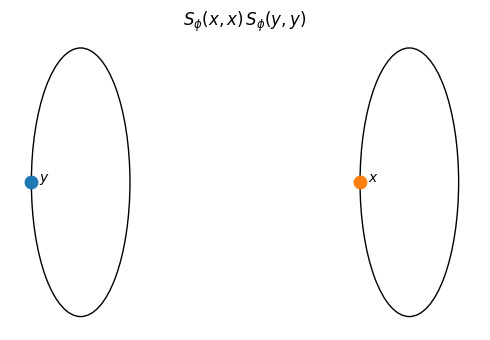

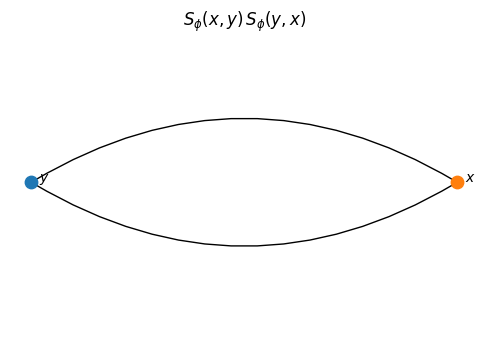

In [3]:
gc.PlotStyle.points['x'] = gc.PlotStyle.point(color='C1')
c.draw()

The library also offers a dark background

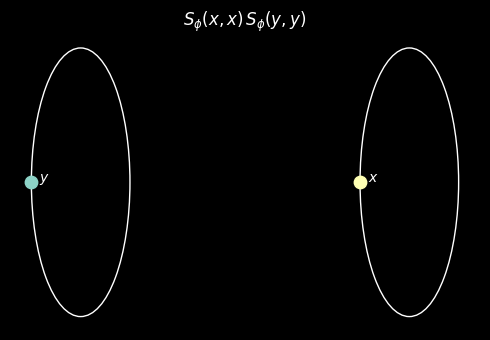

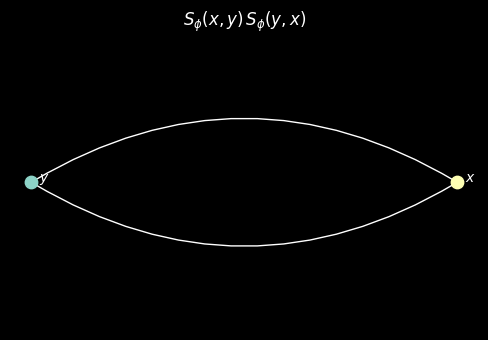

In [4]:
gc.PlotStyle.style = 'dark_background'
c.draw()

Generate random names for variables. Every time it is called it generates a new name. It is very useful for variables that are summed over

In [5]:
for _ in range(10):
    gc.print(gc.default.var())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Photon field

The photon is a massless spin-1 gauge field responsible for electromagnetic interactions.

Within **giancarlo**, photon fields carry Lorentz indices and can be combined seamlessly with other fields.

The library supports photon propagators, (Lorentz) index contractions, and gauge-field interactions, enabling compact symbolic calculations involving electromagnetic exchanges and loops.

In [6]:
A = gc.PhotonField()

prop = A('x', r'\mu') * A('y', r'\nu')
prop.wick()

( +S_{A}(x, y)(\mu, \nu) )

# Scalar QED

Scalar quantum electrodynamics describes charged scalar fields interacting with the electromagnetic field.

The vertex between charged scalar fields coupled to photons can be easily specified at the user level, with interaction terms and contractions handled consistently. 

Correlation functions with several insertions of the scalar QED vertex are constructed via simple multiplications, and contractions are generated automatically. The resulting expressions can be represented via Feynman diagrams while remaining fully symbolic.

Below we introduce a current that couples the photon field with the scalar field and we evaluate some bubble diagrams. Evidently the coupling should be proportional to the momentum but we neglect this aspect here and focus only on the diagrammatic aspect.

<IPython.core.display.Math object>

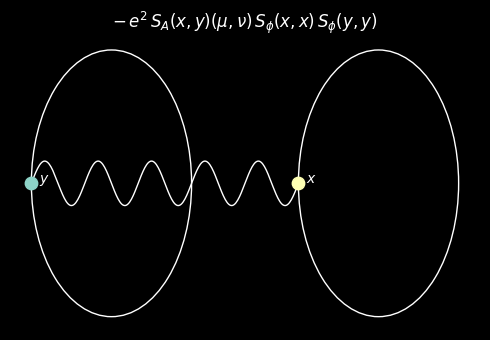

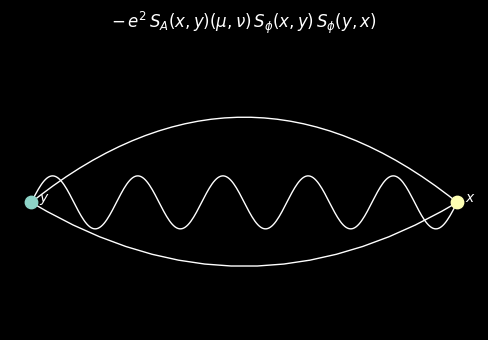

In [7]:
def Jgamma(x, mu):
    return gc.CNumber(-1j) * gc.Symbol('e') * phidag(x) * A(x,mu) * phi(x)

bubble = Jgamma('x',r'\mu') * Jgamma('y',r'\nu')
gc.print(bubble)

bubble.wick().draw()

Now we examine the QED corrections to the scalar propagator.

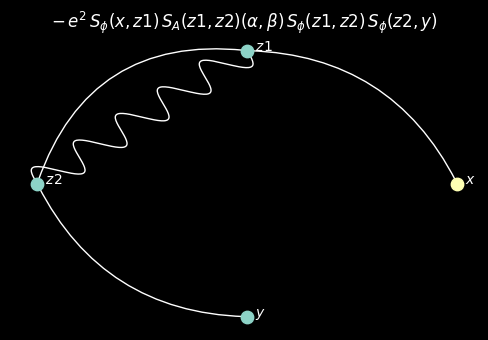

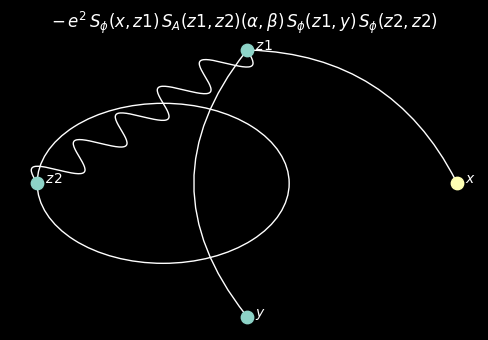

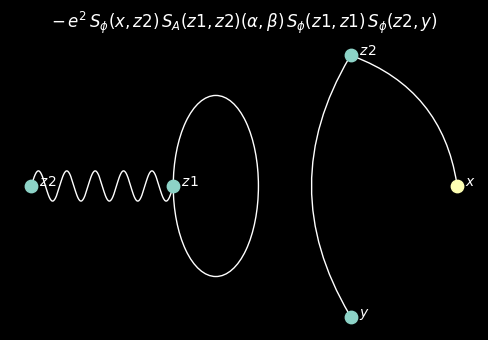

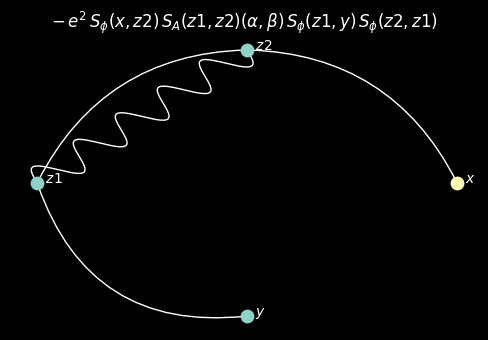

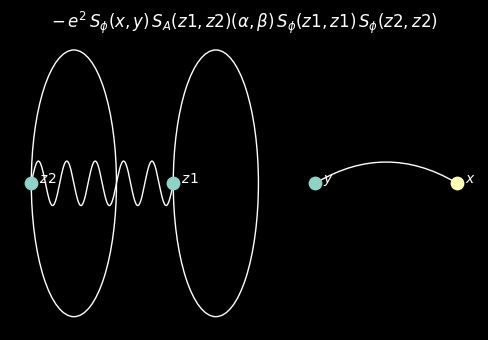

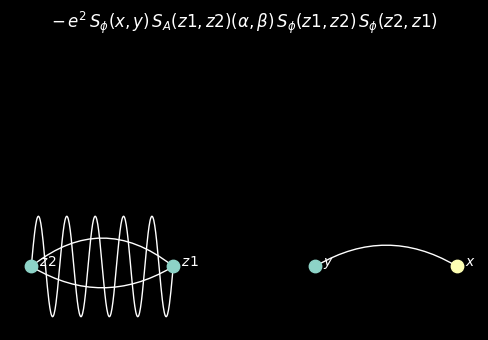

In [8]:
prop = phi('x') * Jgamma('z1',r'\alpha') * Jgamma('z2',r'\beta') * phidag('y')
prop.wick().simplify().draw()

**giancarlo** supports certain symmetries. One example is the exchange symmetry between the initial and final point of a photon propagator. 

Looking at the diagrams above in fact one can easily identify diagrams with identical topologies. Such simplifications can be achieved by specifying the appropriate symmetries when calling the command `simplify`.

In this case we need the `ExchangeSymmetry` class and we should specify that the open indices in the two currents, the position and the Lorentz index, can be exchanged. With this knowledge the library automatically collects terms with similar topologies

In [9]:
topo = prop.wick().simplify(gc.ExchangeSymmetry(pos=['z1', 'z2'], lorentz=[r'\alpha',r'\beta']))

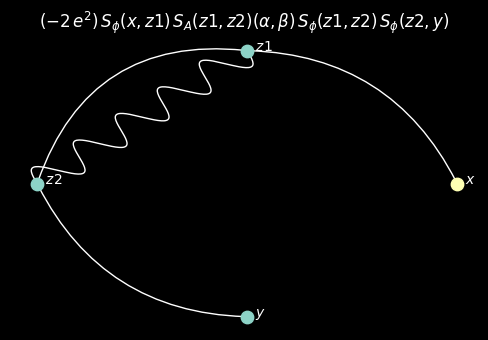

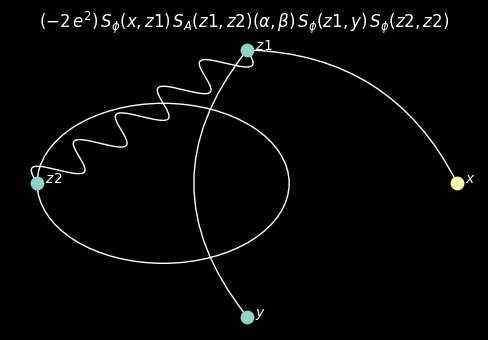

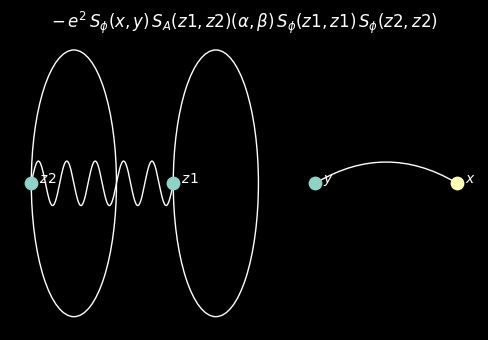

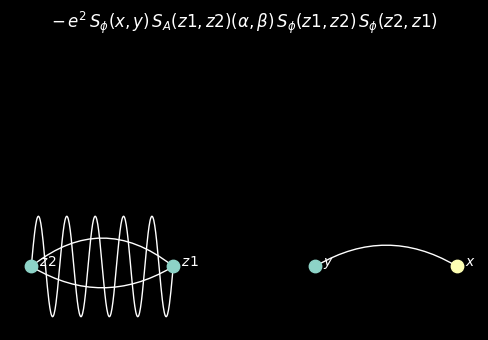

In [10]:
topo.draw()